# Pop Interpoluation 

- Goal of the notebook is to input population values for each missing year.
- Can then calcualte exposure

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import seaborn as sns

In [2]:
# open GHS-UCDB
ghs = gpd.read_file('/home/cascade/tana-crunch-cascade/projects/UrbanHeat/data/raw/GHS_UCDB/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_0.shp')


In [3]:
df_pop = pd.DataFrame()
df_pop['ID_HDC_G0'] = ghs['ID_HDC_G0']
df_pop[1975] = ghs['P75']
df_pop[1990] = ghs['P90']
df_pop[2000] = ghs['P00']
df_pop[2015] =  ghs['P15']

df_pop.head(1)

,ID_HDC_G0,1975,1990,2000,2015
0,5782,76680.40387,77349.278442,75261.170776,69023.903442


# Interp Function

In [26]:
def df_interp(df, start_col, end_col):
    """ Runs a linear interpolution between two df columns
    Args:
        df = dataframe
        start_col = start column, start year
        end_col = end column, end year
    """
    
    new_df = pd.DataFrame() # make an empty df
    nan_list = np.full((1, len(df)), np.nan)[0] # make an empty df list

    new_df['P'+str(start_col)] = df[start_col] # snag the first column
    
    # make a bunch of nan cols
    for i in range(end_col - start_col - 1):
        i = i + 1 # fix zero indexing
        column = 'P'+str(start_col+i) 
        new_df[column] = nan_list
    
    new_df['P'+str(end_col)] = df_pop[end_col]
    
    # interp ! ! !
    new_df = new_df.interpolate('linear', axis = 1)
    
    return new_df

In [27]:
df7590 = df_interp(df_pop, 1975, 1990)

df7590.head()


,P1975,P1976,P1977,P1978,P1979,P1980,P1981,P1982,P1983,P1984,P1985,P1986,P1987,P1988,P1989,P1990
0,76680.403870,76724.995508,76769.587146,76814.178784,76858.770422,76903.362061,76947.953699,76992.545337,77037.136975,77081.728613,77126.320251,77170.911890,77215.503528,77260.095166,77304.686804,77349.278442
1,432518.760010,430308.818037,428098.876064,425888.934091,423678.992118,421469.050145,419259.108173,417049.166200,414839.224227,412629.282254,410419.340281,408209.398308,405999.456335,403789.514363,401579.572390,399369.630417
2,83301.193208,82988.143283,82675.093359,82362.043434,82048.993509,81735.943584,81422.893660,81109.843735,80796.793810,80483.743885,80170.693961,79857.644036,79544.594111,79231.544186,78918.494262,78605.444337
3,59961.838394,60449.793404,60937.748414,61425.703424,61913.658434,62401.613444,62889.568454,63377.523464,63865.478474,64353.433484,64841.388494,65329.343504,65817.298514,66305.253524,66793.208534,67281.163544
4,216241.069946,215363.900885,214486.731824,213609.562762,212732.393701,211855.224640,210978.055579,210100.886517,209223.717456,208346.548395,207469.379333,206592.210272,205715.041211,204837.872150,203960.703088,203083.534027


In [28]:
df9000 = df_interp(df_pop, 1990, 2000)
df9000.head()


,P1990,P1991,P1992,P1993,P1994,P1995,P1996,P1997,P1998,P1999,P2000
0,77349.278442,77140.467676,76931.656909,76722.846143,76514.035376,76305.224609,76096.413843,75887.603076,75678.792310,75469.981543,75261.170776
1,399369.630417,394474.283168,389578.935919,384683.588670,379788.241422,374892.894173,369997.546924,365102.199675,360206.852426,355311.505177,350416.157928
2,78605.444337,78074.399975,77543.355613,77012.311251,76481.266889,75950.222527,75419.178165,74888.133803,74357.089441,73826.045079,73295.000717
3,67281.163544,67936.399316,68591.635089,69246.870862,69902.106635,70557.342407,71212.578180,71867.813953,72523.049725,73178.285498,73833.521271
4,203083.534027,200944.217892,198804.901758,196665.585623,194526.269489,192386.953354,190247.637219,188108.321085,185969.004950,183829.688815,181690.372681


In [29]:
df0015 = df_interp(df_pop, 2000, 2015)
df0015.head()

,P2000,P2001,P2002,P2003,P2004,P2005,P2006,P2007,P2008,P2009,P2010,P2011,P2012,P2013,P2014,P2015
0,75261.170776,74845.352954,74429.535132,74013.717310,73597.899487,73182.081665,72766.263843,72350.446021,71934.628198,71518.810376,71102.992554,70687.174731,70271.356909,69855.539087,69439.721265,69023.903442
1,350416.157928,345850.256691,341284.355453,336718.454215,332152.552977,327586.651740,323020.750502,318454.849264,313888.948027,309323.046789,304757.145551,300191.244313,295625.343076,291059.441838,286493.540600,281927.639362
2,73295.000717,74816.883881,76338.767044,77860.650208,79382.533371,80904.416534,82426.299698,83948.182861,85470.066025,86991.949188,88513.832352,90035.715515,91557.598679,93079.481842,94601.365005,96123.248169
3,73833.521271,74478.275513,75123.029755,75767.783997,76412.538239,77057.292480,77702.046722,78346.800964,78991.555206,79636.309448,80281.063690,80925.817932,81570.572174,82215.326416,82860.080658,83504.834900
4,181690.372681,179915.229673,178140.086666,176364.943658,174589.800651,172814.657644,171039.514636,169264.371629,167489.228621,165714.085614,163938.942607,162163.799599,160388.656592,158613.513584,156838.370577,155063.227570


In [50]:
# Try getting 2016 values

new_df = pd.DataFrame() # make an empty df
nan_list = np.full((1, len(df_pop)), np.nan)[0] # make an empty df list
new_df['P2000'] = df_pop[2000]
new_df['P2015'] = df_pop[2015]
new_df['P2016'] = nan_list

new_df = new_df.interpolate('linear', axis = 1)
new_df.head()

,P2000,P2015,P2016
0,75261.170776,69023.903442,69023.903442
1,350416.157928,281927.639362,281927.639362
2,73295.000717,96123.248169,96123.248169
3,73833.521271,83504.834900,83504.834900
4,181690.372681,155063.227570,155063.227570


In [51]:
# join

df_join = df7590.join(df9000.iloc[:,1:])
df_join = df_join.join(df0015.iloc[:,1:])
df_join['P2016'] = new_df['P2016']

In [52]:
df_join['ID_HDC_G0'] = ghs['ID_HDC_G0']

In [53]:
df_join.head()

,P1975,P1976,P1977,P1978,P1979,P1980,P1981,P1982,P1983,P1984,...,P2008,P2009,P2010,P2011,P2012,P2013,P2014,P2015,P2016,ID_HDC_G0
0,76680.403870,76724.995508,76769.587146,76814.178784,76858.770422,76903.362061,76947.953699,76992.545337,77037.136975,77081.728613,...,71934.628198,71518.810376,71102.992554,70687.174731,70271.356909,69855.539087,69439.721265,69023.903442,69023.903442,5782
1,432518.760010,430308.818037,428098.876064,425888.934091,423678.992118,421469.050145,419259.108173,417049.166200,414839.224227,412629.282254,...,313888.948027,309323.046789,304757.145551,300191.244313,295625.343076,291059.441838,286493.540600,281927.639362,281927.639362,3316
2,83301.193208,82988.143283,82675.093359,82362.043434,82048.993509,81735.943584,81422.893660,81109.843735,80796.793810,80483.743885,...,85470.066025,86991.949188,88513.832352,90035.715515,91557.598679,93079.481842,94601.365005,96123.248169,96123.248169,5645
3,59961.838394,60449.793404,60937.748414,61425.703424,61913.658434,62401.613444,62889.568454,63377.523464,63865.478474,64353.433484,...,78991.555206,79636.309448,80281.063690,80925.817932,81570.572174,82215.326416,82860.080658,83504.834900,83504.834900,3185
4,216241.069946,215363.900885,214486.731824,213609.562762,212732.393701,211855.224640,210978.055579,210100.886517,209223.717456,208346.548395,...,167489.228621,165714.085614,163938.942607,162163.799599,160388.656592,158613.513584,156838.370577,155063.227570,155063.227570,3539


In [13]:
#df_join.to_csv('/home/cascade/projects/data_out_urbanheat/GHS-UCDB-Interp.csv')

# Make long format

In [56]:
# Make Population Long Format

pop_long = pd.wide_to_long(df_join, stubnames = 'P', i = 'ID_HDC_G0', j = 'year')
pop_long.reset_index(level=0, inplace=True)
pop_long.reset_index(level=0, inplace=True)

In [57]:
pop_long.head()

,year,ID_HDC_G0,P
0,1975,5782,76680.403870
1,1975,3316,432518.760010
2,1975,5645,83301.193208
3,1975,3185,59961.838394
4,1975,3539,216241.069946


# Try to Calc People Days

In [99]:
DATA_IN = "/home/cascade/projects/data_out_urbanheat/"  # Note: Need ?dl=1 to make sure this file gets read correctly
FN = 'All_data20191109_final.csv'
df = pd.read_csv(DATA_IN+FN)
FIG_OUT = '/home/cascade/projects/figures/'

In [84]:
df.columns

Index(['Unnamed: 0', 'CTR_MN_NM', 'Event_ID', 'GCPNT_LAT', 'GCPNT_LON',
       'ID_HDC_G0', 'avg_intensity', 'avg_temp', 'duration', 'event_dates',
       'intensity', 'intermediate-region', 'region', 'sub-region', 'tmax',
       'tot_intensity', 'total_days', 'year', 'start_date'],
      dtype='object')

In [129]:
# Get Total Days 

data = df.drop_duplicates(['year', 'ID_HDC_G0'], keep = 'first') # drop out duplicates

pdays = pd.DataFrame()
pdays['ID_HDC_G0'] = data['ID_HDC_G0']
pdays['year'] = data['year']
pdays['total_days'] = data['total_days']
pdays['CTR_MN_NM'] = data['CTR_MN_NM']
pdays['sub-region'] = data['sub-region']


In [130]:
# Try to merge with Pdays
print(len(pdays))
pdays_merge = pdays.merge(pop_long, on=['ID_HDC_G0', 'year'], how = 'left')
print(len(pdays_merge))


153517
153517


In [131]:
pdays_merge['people_days'] = pdays_merge['total_days'] * pdays_merge['P'] / 10**9


# How has exposure changed overtime?

In [132]:
# styles
kwargs = {'linewidth':0.7, 'marker': 'o'} #linestyle: '--'

# Make Years List
years = np.unique(df['year'])
years

array([1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

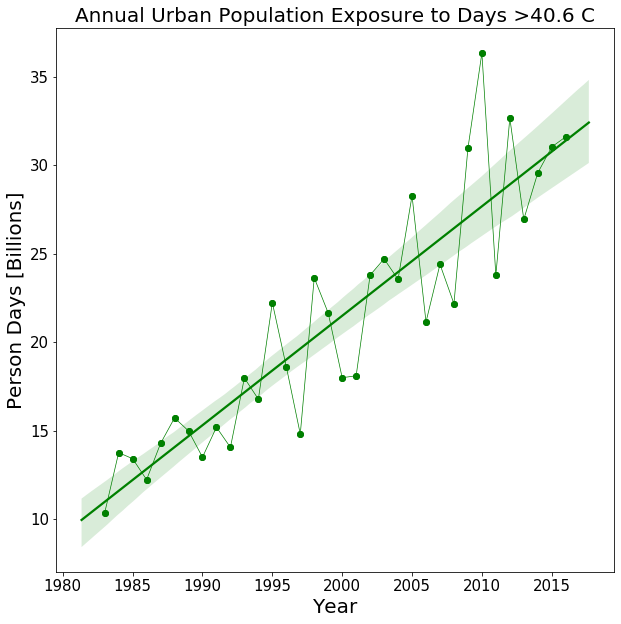

In [142]:
fig, ax1 = plt.subplots(1, figsize = (10,10), sharex=True)

# Total Days
data = pdays_merge.groupby(['year'])['people_days'].sum()
sns.regplot(years, data, color = 'green', ax = ax1)
ax1.plot(data, **kwargs, color = 'green')

ax1.set_title('Annual Urban Population Exposure to Days >40.6 C', fontsize = 20)
ax1.set_ylabel('Person Days [Billions]', fontsize = 20)
ax1.set_xlabel('Year', fontsize = 20)
ax1.tick_params(labelsize = 15)

plt.savefig(FIG_OUT+'AGU_Global_PersonDays.png')

### People Severity --- Exposure

In [180]:
# Add Severity
df['severity'] = df['tot_intensity'] * df['duration']

In [181]:
# Get Total Days 

data = pd.DataFrame()
data['ID_HDC_G0'] = df['ID_HDC_G0']
data['year'] = df['year']
data['severity'] = df['severity']
data['CTR_MN_NM'] = df['CTR_MN_NM']
data['sub-region'] = df['sub-region']



In [182]:
# Try to merge with Pdays
print(len(data))
data_merge = data.merge(pop_long, on=['ID_HDC_G0', 'year'], how = 'left')
print(len(data_merge))

883012
883012


In [183]:
data_merge.head()

,ID_HDC_G0,year,severity,CTR_MN_NM,sub-region,P
0,2784,1983,3.859750,Germany,Western Europe,9.976361e+05
1,2784,2013,0.058337,Germany,Western Europe,1.538112e+06
2,2833,1983,6.893180,Germany,Western Europe,6.014093e+04
3,2833,1984,1.187350,Germany,Western Europe,6.033127e+04
4,2833,1998,0.793425,Germany,Western Europe,6.411484e+04


In [184]:
data_merge['exposure'] =data_merge['severity'] * data_merge['P'] / 10**9


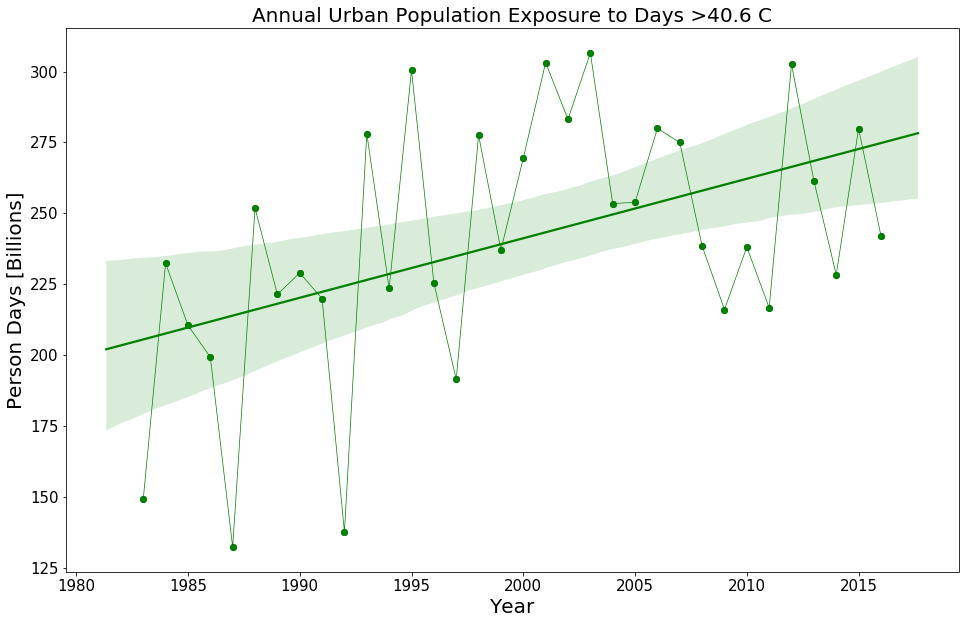

In [187]:
fig, ax1 = plt.subplots(1, figsize = (16,10), sharex=True)

# Total Days
data = data_merge.groupby(['year'])['severity'].mean()
sns.regplot(years, data, color = 'green', ax = ax1)
ax1.plot(data, **kwargs, color = 'green')

ax1.set_title('Annual Urban Population Exposure to Days >40.6 C', fontsize = 20)
ax1.set_ylabel('Person Days [Billions]', fontsize = 20)
ax1.set_xlabel('Year', fontsize = 20)
ax1.tick_params(labelsize = 15)

#plt.savefig(FIG_OUT+'AGU_Global_PersonDays.png')

# Regessions

-- double check this

In [207]:
# Get Total Days 

data = df.drop_duplicates(['year', 'ID_HDC_G0'], keep = 'first') # drop out duplicates

pdays = pd.DataFrame()
pdays['ID_HDC_G0'] = data['ID_HDC_G0']
pdays['year'] = data['year']
pdays['total_days'] = data['total_days']
pdays['CTR_MN_NM'] = data['CTR_MN_NM']
pdays['sub-region'] = data['sub-region']

# Try to merge with Pdays
print(len(pdays))
pdays_merge = pdays.merge(pop_long, on=['ID_HDC_G0', 'year'], how = 'left')
print(len(pdays_merge))

pdays_merge['people_days'] = pdays_merge['total_days'] * pdays_merge['P'] 

pdays_merge.head()

153517
153517


,ID_HDC_G0,year,total_days,CTR_MN_NM,sub-region,P,people_days
0,2784,1983,1,Germany,Western Europe,9.976361e+05,9.976361e+05
1,2784,2013,1,Germany,Western Europe,1.538112e+06,1.538112e+06
2,2833,1983,1,Germany,Western Europe,6.014093e+04,6.014093e+04
3,2833,1984,1,Germany,Western Europe,6.033127e+04,6.033127e+04
4,2833,1998,1,Germany,Western Europe,6.411484e+04,6.411484e+04


In [223]:
from numpy.polynomial.polynomial import polyfit

# make things easier for OLS
regressor = LinearRegression()  

# Geog 
geog = 'ID_HDC_G0'

# Set stat
stats = 'people_days'

# dataset
data = pdays_merge

# Get results

labels = []
r2_list = []
coef_list = []
p_list = []
df_out = pd.DataFrame()

for label, df_c in data.groupby(geog):
    
    # Get Data
    X_year = np.array(df_c.groupby('year')['ID_HDC_G0'].mean().index).reshape((-1, 1))
    Y_stats = np.array(df_c.groupby('year')[stats].sum()).reshape((-1, 1))
    
    # Add Intercept
    X_year_2 = sm.add_constant(X_year)
    
    # Regress
    model = sm.OLS(Y_stats, X_year).fit()
    coef = model.params[0]
    r2 = model.rsquared_adj
    p = model.pvalues[0]
    
    # Make lists
    labels.append(label)
    r2_list.append(r2)
    coef_list.append(coef)
    p_list.append(p)
#     print(label)
#     print(model.summary())
    
# Make data frame
df_out[geog] = labels
df_out['r2'] = r2_list
df_out['coef'] = coef_list
df_out['p_value'] = [round(elem, 4) for elem in p_list]

In [224]:
df_out_sort = df_out.sort_values(by = 'coef', axis=0, 
                   ascending=False, inplace=False, kind='quicksort', na_position='last').head(1000)


In [225]:
df_out_sort.head()

,ID_HDC_G0,r2,coef,p_value
3266,6955,0.811632,272254.114012,0.0
1691,4335,0.885452,261201.544298,0.0
2018,5314,0.952982,233307.497790,0.0
2212,5698,0.822249,167120.112693,0.0
2990,6651,0.926648,160592.591401,0.0


In [226]:
df_out_sort = df_out_sort.merge(ghs[['geometry', 'ID_HDC_G0',
                                'GCPNT_LAT', 'GCPNT_LON']], on = 'ID_HDC_G0', how = 'inner')

In [229]:
df_out_sort.to_csv(DATA_IN+'City_1000_PDCoef.csv')

In [211]:
countries = gpd.read_file(DATA_IN+'Countries_WGS84.shp')
countries.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.8822326660156 12.4111099243165, ..."
1,2,Antigua and Barbuda,"(POLYGON ((-61.7388916015625 17.5405540466309,..."
2,3,Afghanistan,"POLYGON ((61.2765579223633 35.6072463989258, 6..."
3,4,Algeria,"POLYGON ((-5.15213489532459 30.1804695129396, ..."
4,5,Azerbaijan,"(POLYGON ((45.0258293151855 41.0305480957031, ..."


In [214]:
countries.rename(columns={'CNTRY_NAME': 'CTR_MN_NM'}, inplace=True)
df_out_sort= df_out_sort.merge(countries[['CTR_MN_NM', 'geometry']], on = 'CTR_MN_NM', how = 'inner')
df_out_sort.head()

,CTR_MN_NM,r2,coef,p_value,geometry
0,India,0.905408,5.441114e+06,0.0,"(POLYGON ((92.2686004638671 23.7194404602051, ..."
1,Pakistan,0.926917,1.086592e+06,0.0,"POLYGON ((63.2304382324219 29.4736976623535, 6..."
2,Iraq,0.921272,8.586841e+05,0.0,"POLYGON ((39.1967430114746 32.154941558838, 39..."
3,Sudan,0.873843,6.542957e+05,0.0,"POLYGON ((35.8216629028321 5.32861042022711, 3..."
4,Saudi Arabia,0.834523,4.864961e+05,0.0,"(POLYGON ((51.2152252197266 18.8215637207031, ..."


In [216]:
gpd.GeoDataFrame(df_out_sort).to_file(DATA_IN+'Ctr10_Pdcoef.shp')